In [1]:
import pandas as pd
import numpy as np
from doc_bd import Manage_db
import json
import os
import mysql.connector
from mysql.connector import errorcode
import re
import urllib3 
import time
import warnings
warnings.filterwarnings('ignore')
urllib3.disable_warnings()
import matplotlib.pyplot as plt
from pymongo import MongoClient
#import sklearn

In [2]:
sql = Manage_db(database = 'lop2test', host = 'localhost', user='root', password='')

client = MongoClient("localhost", 27017)
db = client['lop2test']
submissions_lop = db['submissions']

#df_class.loc[df['id_class'] == 'f2dd7bef-5b5d-4cb3-9efa-aa8652af0605']
id_class = 'e378c59f-e815-4a41-95fc-e95e4432a34c'
#pd_data = pd.DataFrame([id_class], columns = ['id_class'])
condition = "WHERE class_id = 'e378c59f-e815-4a41-95fc-e95e4432a34c'"
df_submission = sql.search(table='submission')
list_quest_subm = df_submission.drop(['ip', 'id', 'environment','hitPercentage','timeConsuming','createdAt','type','language', 'answer', 'char_change_number', 'user_id', 'lesson_id', 'class_id', 'test_id'], axis=1).drop_duplicates()
df_submission_class = sql.search(table='submission', condition=condition)
df_lop_lists = sql.search(table='listQuestions')

df_lop_tests = sql.search(table='test')

df_class = sql.search(table='class')
df_quest = sql.search(table='question')

users_class = sql.search(table='classHasUser')
tag = sql.search(table='tag')
quest_tag = sql.search(table='questionHasTag')
df_list_q = sql.search(table='listHasQuestion')

In [3]:
tag.columns.values[0] ='tag_id'
list_class = df_submission_class['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_class = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_class = df_list_class.append(b, ignore_index=True)
df_list_class.columns.values[0] = 'listQuestions_id'

test_class = df_submission_class['test_id'].drop_duplicates().reset_index(name='id')
a = df_lop_tests.columns.tolist()
df_test_class = pd.DataFrame(columns = a)

for i in range(test_class.count().values[0]):
    for a in range(df_lop_tests.count().values[0]):
        if test_class['id'][i] == df_lop_tests['id'][a]:
            b = dict(df_lop_tests.loc[a])
            df_test_class = df_test_class.append(b, ignore_index=True)
df_test_class.columns.values[0] = 'test_id'

quest_class = df_submission_class['question_id'].drop_duplicates().reset_index(name='id')
a = df_quest.columns.tolist()
df_quest_class = pd.DataFrame(columns = a)

for i in range(quest_class.count().values[0]):
    for a in range(df_quest.count().values[0]):
        if quest_class['id'][i] == df_quest['id'][a]:
            b = dict(df_quest.loc[a])
            df_quest_class = df_quest_class.append(b, ignore_index=True)
df_quest_class.columns.values[0] = 'question_id'

#verificando o total de questoes cadastrados em listas da turma 
list_name = df_list_class['listQuestions_id'].tolist()
a = df_list_q.columns.tolist()
df_q_l = pd.DataFrame(columns = a)

for i in range(df_list_class.count().values[0]):
    for a in range(df_list_q.count().values[0]):
        if df_list_class['listQuestions_id'][i] == df_list_q['list_id'][a]:
            b = dict(df_list_q.loc[a])
            df_q_l = df_q_l.append(b, ignore_index=True)

subs =[]
for x in submissions_lop.find():
    subs.append(x)
df_class_lop = pd.DataFrame(subs)

In [4]:
list_class = df_class_lop['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_lop = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_lop = df_list_lop.append(b, ignore_index=True)
df_list_lop.columns.values[0] = 'listQuestions_id'
df_list_lop

,listQuestions_id,title,code,createdAt,updatedAt,author_id
0,9338cc7b-7cf4-4d9f-af63-25a7effa7189,(Lop) Estruturas de decisão - Múltiplas decisões,358922cf78,2020-03-23 16:07:21,2020-09-15 00:03:03,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
1,dd1cd083-6c00-4605-9ff1-163bd4069363,Repetição condicional - Lista Resolvida (LOP),f00e8a3272,2020-06-24 11:44:44,2020-06-24 13:30:49,2985b749-e081-400c-b2cc-97ae042a777d
2,aca84206-87b2-4478-afa4-6193119cc06a,Repetição condicional - Lista de Exercícios (LOP),0814ea8f94,2020-06-29 12:19:48,2020-06-29 12:19:48,2985b749-e081-400c-b2cc-97ae042a777d
3,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,Laboratório 01 - Expressões Aritméticas,d0947edaac,2020-02-28 14:49:23,2020-02-28 14:49:23,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
4,813dedaa-0989-489b-9804-3850ae4b83d1,Repetição contada - Lista Prática (LOP),73a86e8081,2020-07-07 11:56:51,2020-07-07 11:56:51,02673ba8-1fcb-4cb0-9cf3-a789cab48731
5,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,Repetição contada - Lista de Exercícios (LOP),7a2e23fcb3,2020-07-07 11:59:39,2020-07-07 11:59:39,02673ba8-1fcb-4cb0-9cf3-a789cab48731
6,5ebe517f-50f2-4629-a22f-1dea895fce25,Aula - Funções Aritméticas,4749406f21,2020-03-04 21:55:18,2020-03-04 21:55:18,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
7,1551e3ed-c875-4bb3-8e4e-58407df40776,Vetores - Lista de Exercícios (LOP),309289819d,2020-07-16 17:37:42,2020-07-16 17:37:42,6a36fa60-665f-4d15-a9de-0a523b93ca71
8,cf509a46-6a97-440e-a5c0-f7ba7537ef96,(Lop) Estruturas de decisão - problemas sobre ...,5c2cb0df7d,2020-04-08 01:15:40,2020-04-08 01:15:40,None
9,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,Treinamento - Expressões Aritméticas,87add2f05c,2020-03-06 16:09:41,2020-03-06 16:09:41,1a3aa181-9fc6-41e1-b61a-febd18f4eb23


In [5]:
#aprovados - acima da media
#submissoes da turma

#retirando da df_class_lop todas as turmas do 2020.1
l_classes = df_class_lop['class_id'].drop_duplicates().tolist()
nclasses = []
nclasses.append(l_classes[0])
nclasses.append(l_classes[5])
nclasses.append(l_classes[8])

df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[0]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[1]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[2]].index )

df_performance = df_class_lop.groupby(['class_id', 'user_id', 'listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
#soma das notas por lista
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
#Me traz as porcentagens maximas de acerto por questão
df_performance = df_class_lop.groupby(['class_id', 'user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
      #Soma as porcentagens de uma lista/prova unica
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
      #Renomeando para melhorar entendimento
df_performance.rename(columns={'hitPercentage':'totalHitPercentage'}, inplace = True)
#Listas cadastradas nessa turma
lists = df_class_lop['listQuestions_id'].drop_duplicates().values
#Lista de alunos
df_without_duplicates = df_class_lop.drop_duplicates(subset=['class_id', 'user_id'])

df_prov = pd.DataFrame()
for lista in lists:
    df_users = df_without_duplicates.copy()
    df_users['listQuestions_id'] = lista
    df_prov = df_prov.append(df_users)

df_performance = pd.merge(df_performance,df_prov, on=['class_id', 'user_id','listQuestions_id'], how='outer')#.fillna(0)  
      #Conta quantas questões tem por lista
df_question_data = list_quest_subm.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='totalQuestionslist')
      #Merge
df_performance = df_performance.merge(df_question_data, on = 'listQuestions_id')
    #Média de acerto por lista
df_performance['medialist'] = df_performance['totalHitPercentage'] / df_performance['totalQuestionslist']
      #Convertendo para datetime
df_lop_lists['createdAt'] = pd.to_datetime(df_lop_lists['createdAt'])
      #Criando campo com a data
df_lop_lists['dateList'] = df_lop_lists['createdAt'].dt.date
      #Merge
lists_df = df_list_lop
lists_df.columns.values[0] = 'listQuestions_id'

df_performance = pd.merge(df_performance, lists_df.drop(columns = ['createdAt']), on='listQuestions_id')
    #graph1
    #Número de alunos na turma
    #Media por lista por cada turma
newDf = df_performance
newDf = newDf.groupby(['user_id', 'class_id'])['medialist'].sum().reset_index()
newDf['medialist'] = newDf['medialist'] / lists_df.count().values[0]

newDf['aprovado'] = 2
for a in range(newDf.count().values[0]):
    if newDf['medialist'].values[a]>=50:
        newDf['aprovado'][a]=1
    else:
        newDf['aprovado'][a]=0
newDf[newDf['aprovado']==1]

,user_id,class_id,medialist,aprovado
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1
5,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1
6,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1
8,047eb461-ce62-4eb4-bf0f-edea350f4873,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
...,...,...,...,...
473,f69adfc6-de1e-406d-bd3d-9edf2e562ac8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,57.188043,1
477,f7817f2f-cd2e-424a-b085-0411dc4aa1d5,8f055c33-00ad-4284-aec8-da401901e795,56.154995,1
479,fb10ec34-7cf7-4ca7-910b-0cec1331b2b3,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1


In [6]:
df_class_lop_t = df_class_lop.sort_values('createdAt')
classes = df_class_lop_t['class_id'].drop_duplicates().tolist()

order_lists = pd.DataFrame(columns = ['class_id', 'listQuestions_id'])
for i in range(len(classes)):
    one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[i]]
    order_lists0 = one_class['listQuestions_id'].drop_duplicates().tolist()
    for a in range(len(order_lists0)):
        b = dict({'class_id':classes[i], 'listQuestions_id':order_lists0[a]})
        order_lists = order_lists.append(b, ignore_index=True)
#oberservar a ordem de saída de cada user para não ter problemas posteriores, 
#por conta da ordem de inserção do 'ateLista' para cada aluno
usersp = df_class_lop_t.drop_duplicates(subset=['class_id', 'user_id']).drop(['_id','id','ip','type', 'environment', 'hitPercentage','timeConsuming','createdAt','language', 'answer', 'char_change_number', 'lesson_id','test_id', 'question_id', 'listQuestions_id'], axis=1)
usersp['ateLista'] = 0

one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[0]]
users = one_class['user_id'].drop_duplicates().tolist()

alunoPclass = pd.DataFrame(columns = ['class_id', 'qtd_user'])
for x in range(len(classes)):
    teste = df_class_lop_t[df_class_lop_t['class_id']==classes[x]]
    teste = teste['user_id'].drop_duplicates()
    teste = teste.count()
    b = dict({'class_id':classes[x], 'qtd_user':teste})
    alunoPclass = alunoPclass.append(b, ignore_index=True)
alunoPclass

,class_id,qtd_user
0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,90
1,d99923f0-d174-4902-9759-c8220b821d36,55
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,40
3,8f055c33-00ad-4284-aec8-da401901e795,99
4,77335557-c5d1-4144-be6e-84b6114ec22e,22
5,f7144f91-f493-4e55-aac5-39f0d4add995,105
6,e9c7c378-eac4-44b2-b687-4dca6d77cd54,76


In [7]:
lista_ate = []
cont = 0
a = usersp.columns.tolist()
newTeste = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[i]]
    users = one_class['user_id'].drop_duplicates().tolist()
    for y in range(alunoPclass['qtd_user'][i]):
        one_studt = one_class[one_class['user_id']==users[y]]
        qtd_ate_l0 = one_studt['listQuestions_id'].drop_duplicates().tolist()
        maior = 0
        for x in range(len(qtd_ate_l0)):
            order_lists1 = order_lists[order_lists['class_id']==classes[i]]
            order_lists1 = order_lists1['listQuestions_id'].tolist()
            cont=cont+1
            for z in range(len(order_lists1)):
                if qtd_ate_l0[x] == order_lists1[z]:
                    if maior < z:
                        maior = z
        if(users[y]=='fe3c3b36-a1ab-4365-b088-1686cd5177d0'):
            print(maior)
            print(cont)
        b = dict({'class_id':classes[i], 'user_id':users[y], 'ateLista':maior})
        newTeste = newTeste.append(b, ignore_index=True)

#usersp['ateLista']=lista_ate

#codigo está colocando o 'lista_ate' em uma ordem diferente dos usuarios'
#user 'fe3c3b36-a1ab-4365-b088-1686cd5177d0' deveria estar no index 1629
#verificar erro // verificar como está a lista de users em 'usersp' e o que corresponde a lista de users de 'lista_ate'

#usersp[usersp['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']

#teste = df_class_lop_t[df_class_lop_t['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']
#teste = teste['listQuestions_id'].drop_duplicates()
#teste

#newTeste[newTeste['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']
usersp = newTeste.copy()
usersp

15
1629


,user_id,class_id,ateLista
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
1,ab916ff5-180e-401f-a1ff-de548e2d584d,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
...,...,...,...
482,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0
483,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,13
484,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,14
485,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,5


In [8]:
#para verificar por turma
#qtd_ateLista = usersp.groupby(['ateLista', 'class_id'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
qtd_totalAteLista = qtd_ateLista
for x in range(len(qtd_totalAteLista)):
    qtd_totalAteLista['totalDeAlunosAteLista'][x+1]= qtd_totalAteLista['totalDeAlunosAteLista'][x] + qtd_totalAteLista['totalDeAlunosAteLista'][x+1]
    if x==len(qtd_totalAteLista)-2:
        break
usersAteApr = pd.merge(newDf,usersp, on=['user_id', 'class_id'], how='outer')
#erro
aprovs = usersAteApr[usersAteApr['aprovado']==1]
aprAlista = aprovs.groupby(['ateLista'])['aprovado'].count().reset_index(name='totalDeAprAteLista')
ate_Lista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista['totalDeAlunosAteLista']=0.0
for x in range(len(ate_Lista)):
    for a in range(len(aprAlista)):
        if ate_Lista['ateLista'][x] == aprAlista['ateLista'][a]:
            porcentAtePlista['totalDeAlunosAteLista'][x] = aprAlista['totalDeAprAteLista'][a] / ate_Lista['totalDeAlunosAteLista'][x]
#salvando todas as submissoes em ordem temporal
df_class_lop_t = df_class_lop.sort_values('createdAt')
#salavndo a quantidade de listas que cada aluno resolveu
usersQtd = df_class_lop_t.groupby(['user_id','listQuestions_id', 'class_id'])['question_id'].count().reset_index(name='qtdLista')
usersQtd = usersQtd.groupby(['user_id', 'class_id'])['listQuestions_id'].count().reset_index(name='qtdLista')
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porc_qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
for a in range(len(qtd_Lista)):
    atual = usersQtd[usersQtd['qtdLista']==a+1]
    cont=0
    total=atual.count().values[0]
    for x in range(total):
        verif_user=newDf[newDf['user_id']==atual['user_id'].iloc[x]]
        if verif_user['aprovado'].values[0]==1:
            cont=cont+1
usersQtdApr = pd.merge(newDf,usersQtd, on=['user_id', 'class_id'], how='outer')
aprovs = usersQtdApr[usersQtdApr['aprovado']==1]
aprPlista = aprovs.groupby(['qtdLista'])['aprovado'].count().reset_index(name='totalDeAprQtdLista')
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista['totalDeAlunosQtdLista']=0.0
for x in range(len(qtd_Lista)):
    for a in range(len(aprPlista)):
        if qtd_Lista['qtdLista'][x] == aprPlista['qtdLista'][a]:
#            print(x)
            porcentAprPlista['totalDeAlunosQtdLista'][x] = aprPlista['totalDeAprQtdLista'][a] / qtd_Lista['totalDeAlunosQtdLista'][x]
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')

usersQtdApr2 = pd.merge(newDf,usersp, on=['user_id','class_id'], how='outer')
qtd_ate = pd.merge(usersQtd,usersp, on=['user_id','class_id'], how='outer')
usersQtdAte = pd.merge(newDf,qtd_ate, on=['user_id','class_id'], how='outer')
usersQtdAte

,user_id,class_id,medialist,aprovado,qtdLista,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,2.0,1
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1,15.0,15
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1,14.0,15
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,20.817001,0,9.0,12
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,4.074208,0,2.0,13
...,...,...,...,...,...,...
482,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,11.044947,0,6.0,5
483,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,8.666667,0,3.0,11
484,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,18.470588,0,8.0,9
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1,15.0,15


In [9]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por lista, por aluno
df_class_lop_t['timeInSecounds'] = df_class_lop_t['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_class_lop_t[df_class_lop_t["timeInSecounds"] > 0].drop(['language','test_id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','class_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['class_id','user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['class_id','user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['class_id','user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df = pd.merge(df_erro, df_acerto, on=['class_id','user_id'], how='outer')
df = pd.merge(df, df_100, on=['class_id','user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['class_id','user_id']).drop('medialist', axis=1)
df

,class_id,user_id,totalError,totalAcert,acert_100,aprovado
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,12.0,34,15.0,0
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,28.0,113,111.0,0
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,33.0,34,29.0,0
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,434.0,352,157.0,1
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0d327166-a647-4fa2-8def-1a64f55b223c,63.0,54,49.0,0
...,...,...,...,...,...,...
480,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,0.0,5,5.0,0
481,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.0,1,1.0,0
482,8f055c33-00ad-4284-aec8-da401901e795,f1d371cf-c64a-4c51-a00b-93f92b4415be,0.0,1,1.0,0
483,e9c7c378-eac4-44b2-b687-4dca6d77cd54,90161053-2a8e-476e-81ae-75603df8972f,0.0,2,2.0,0


In [10]:
a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')
media_df = pd.merge(df, qtd_qPa, on=['class_id','user_id'])
media_df['totalError'] = media_df['totalError'] / media_df['totalQuest']
media_df['totalAcert'] = media_df['totalAcert'] / media_df['totalQuest']
media_df['acert_100'] = media_df['acert_100'] / media_df['totalQuest']
df_cont_subm = df_without_duplicates.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()
media_df1 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_df1['total_subm'] = media_df1['total_subm'] / media_df1['totalQuest']
df_total = pd.merge(df_cont_subm, df, on=['class_id','user_id'])
prob_total = pd.merge(df_cont_subm, df, on=['class_id','user_id'])
prob_total['totalError'] = prob_total['totalError'] / prob_total['total_subm']
prob_total['totalAcert'] = prob_total['totalAcert'] / prob_total['total_subm']
prob_total['acert_100'] = prob_total['acert_100'] / prob_total['total_subm']
#refazer o indice de desistencia, tendo em vista os índices já vistos 
des = usersp.copy()
des['desistente'] = 2
for a in range(des.count().values[0]):
    if des['ateLista'].values[a]<4:
        des['desistente'][a]=1
    else:
        des['desistente'][a]=0
prob_total_des = pd.merge(des, prob_total, on=['class_id','user_id']).drop('aprovado', axis=1)
df_cont_subm = df_without_duplicates.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()

a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')

media_des0 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_des0['subm/quest'] = media_des0['total_subm'] / media_des0['totalQuest']
media_des = pd.merge(media_des0, des, on=['class_id','user_id'])
#prob_total_des
ind = prob_total_des.copy()
ind = ind.drop(['ateLista', 'total_subm'], axis=1)
ind = pd.merge(ind, media_des0, on=['class_id', 'user_id'])
ind['teste'] = ind['subm/quest'] * ind['totalAcert']
test_des = ind[ind['desistente']==1]
test_ndes = ind[ind['desistente']==0]

newind = ind[ind['teste']<=test_des['teste'].max()]
newind['teste2'] = ind['teste'] * ind['acert_100']
newind

,user_id,class_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste,teste2
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.703549,0.296451,0.128740,1437,124,11.588710,3.435484,0.442286
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.490085,0.509915,0.311615,353,109,3.238532,1.651376,0.514593
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.542587,0.457413,0.309148,634,124,5.112903,2.338710,0.723008
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667,0.270899
5,105d68c3-d07d-4cc4-a706-f46d46c5101a,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.473529,0.526471,0.305882,340,101,3.366337,1.772277,0.542108
...,...,...,...,...,...,...,...,...,...,...,...
480,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1,0.823529,0.176471,0.117647,17,3,5.666667,1.000000,0.117647
481,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.016949,0.983051,0.983051,118,116,1.017241,1.000000,0.983051
482,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.631707,0.368293,0.280488,410,106,3.867925,1.424528,0.399563
483,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.527638,0.472362,0.351759,199,62,3.209677,1.516129,0.533312


In [11]:
df_class_lop_t['timeInSecounds'] = df_class_lop_t['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_class_lop_t[df_class_lop_t["timeInSecounds"] > 0].drop(['language','test_id','environment','timeConsuming','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)

a = df_without_duplicates.columns.tolist()
list1 = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_without_duplicates[df_without_duplicates['class_id']==classes[i]]
    order_lists1 = order_lists[order_lists['class_id']==classes[i]]
    order_lists1 = order_lists1['listQuestions_id'].tolist()
    order_lists1 = order_lists1[0]
    listeste = one_class[one_class['listQuestions_id']==order_lists1]
    list1 = list1.append(listeste, ignore_index=True)

a = df_without_duplicates.columns.tolist()
list2 = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_without_duplicates[df_without_duplicates['class_id']==classes[i]]
    order_lists1 = order_lists[order_lists['class_id']==classes[i]]
    order_lists1 = order_lists1['listQuestions_id'].tolist()
    order_lists1 = order_lists1[1]
    listeste = one_class[one_class['listQuestions_id']==order_lists1]
    list2 = list2.append(listeste, ignore_index=True)

a = df_without_duplicates.columns.tolist()
list3 = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_without_duplicates[df_without_duplicates['class_id']==classes[i]]
    order_lists1 = order_lists[order_lists['class_id']==classes[i]]
    order_lists1 = order_lists1['listQuestions_id'].tolist()
    order_lists1 = order_lists1[2]
    listeste = one_class[one_class['listQuestions_id']==order_lists1]
    list3 = list3.append(listeste, ignore_index=True)
list3

,_id,hitPercentage,createdAt,user_id,question_id,listQuestions_id,class_id,timeInSecounds
0,62ba0b156b39e22d8ad5d523,100.0,2021-01-22 02:25:27,337cb03d-871a-4e38-8ab1-f79f8a0d8807,2ebe9899-2135-498f-b456-98c51902b66a,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,88
1,62ba0b006b39e22d8ad55089,0.0,2021-01-22 02:28:30,337cb03d-871a-4e38-8ab1-f79f8a0d8807,4c006108-460a-4a76-aac3-63b0606f0a86,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,168
2,62ba0b186b39e22d8ad5e7c5,0.0,2021-01-22 02:30:37,337cb03d-871a-4e38-8ab1-f79f8a0d8807,4c006108-460a-4a76-aac3-63b0606f0a86,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,232
3,62ba0b016b39e22d8ad55921,0.0,2021-01-22 02:31:39,337cb03d-871a-4e38-8ab1-f79f8a0d8807,4c006108-460a-4a76-aac3-63b0606f0a86,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,229
4,62ba0b096b39e22d8ad58bba,100.0,2021-01-22 02:31:50,337cb03d-871a-4e38-8ab1-f79f8a0d8807,4c006108-460a-4a76-aac3-63b0606f0a86,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,176
...,...,...,...,...,...,...,...,...
21164,62bb1a0da1d1cb290dde49f5,25.0,2022-02-25 19:42:33,38df28f4-b883-4fb4-a4f6-97b7d0098dc4,0d2d68b0-a360-4c06-9c6a-d3b6d19c2142,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,689
21165,62bb1a18a1d1cb290dde8bad,100.0,2022-02-25 19:45:02,38df28f4-b883-4fb4-a4f6-97b7d0098dc4,0d2d68b0-a360-4c06-9c6a-d3b6d19c2142,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,836
21166,62bb1a0fa1d1cb290dde548f,0.0,2022-02-25 19:54:56,38df28f4-b883-4fb4-a4f6-97b7d0098dc4,a9d429e0-ec48-42f2-bb62-d294de0cbaef,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,223
21167,62bb1a15a1d1cb290dde787c,0.0,2022-02-25 19:57:22,38df28f4-b883-4fb4-a4f6-97b7d0098dc4,a9d429e0-ec48-42f2-bb62-d294de0cbaef,42d5c4ad-7b44-4e4e-b2e5-2997785132c8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,367


In [12]:
des_aqui = des.copy()

tlist3 = list1.copy()
tlist3 = tlist3.append(list2)
tlist3 = tlist3.append(list3)
tlist3 = tlist3.reset_index()

a = des_aqui[ des_aqui['ateLista'] < 2]
indexNames = []
for i in a.values:
    b = tlist3[tlist3['user_id'] == i[0]].index
    for x in b:
        indexNames.append(x)
tlist3 = tlist3.drop(tlist3.index[indexNames])

for a in range(des_aqui.count().values[0]):
    if des_aqui['ateLista'].values[a]<3:
        des_aqui['desistente'][a]=1
    else:
        des_aqui['desistente'][a]=0
        
a = des[ des['ateLista'] < 2]
indexNames = []
for i in a.values:
    b = des_aqui[des_aqui['user_id'] == i[0]].index
    for x in b:
        indexNames.append(x)
des_aqui = des_aqui.drop(des_aqui.index[indexNames])

list3 = tlist3.copy()

df_erro = list3[list3["hitPercentage"] == 0]
df_erro = df_erro.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['class_id','user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = list3[list3["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['class_id','user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = list3[list3["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['class_id','user_id'])['acert_100'].sum()

df_cont_subm = list3.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()

a = list3.drop(['_id', 'hitPercentage', 'listQuestions_id','createdAt', 'timeInSecounds'], axis=1)
a = a.drop('index', axis=1)
a = a.drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')

media_list1 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_list1['subm/quest'] = media_list1['total_subm'] / media_list1['totalQuest']

tempott = list3.groupby(['class_id','user_id'])['timeInSecounds'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df_list3 = pd.merge(df_erro, df_acerto, on=['class_id','user_id'], how='outer')
df_list3 = pd.merge(df_list3, df_100, on=['class_id','user_id'], how='outer')
df_list3.replace(np.NaN, 0, inplace = True)
df_list3 = pd.merge(df_list3, des_aqui, on=['class_id','user_id'])
df_list3 = pd.merge(df_list3, media_list1, on=['class_id','user_id'])
df_list3 = pd.merge(df_list3, tempott, on=['class_id','user_id'])
#des_aqui[des_aqui['desistente']==1]
#print(des_aqui[des_aqui['desistente']==1].count().values[0])
df_list3

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,7.0,31.0,31.0,14,0,38,29,1.310345,12275
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,28.0,25.0,23.0,13,0,53,24,2.208333,12444
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,56.0,67.0,41.0,15,0,123,29,4.241379,71581
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,10a7114c-acfa-4168-9c7b-5f0ade3e35b0,102.0,48.0,33.0,13,0,150,29,5.172414,85528
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,1634bece-b1d5-4ed2-8946-d61272e4e25c,101.0,37.0,25.0,15,0,138,23,6.000000,116678
...,...,...,...,...,...,...,...,...,...,...,...
438,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,121.0,34.0,29.0,15,0,155,27,5.740741,96513
439,f7144f91-f493-4e55-aac5-39f0d4add995,fd66de81-b657-41bb-9903-73370d0a0158,17.0,19.0,19.0,11,0,36,24,1.500000,9063
440,8f055c33-00ad-4284-aec8-da401901e795,94e36d62-d8e9-4177-82cd-3bc0d9aeb3fe,0.0,27.0,27.0,15,0,27,27,1.000000,122
441,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.0,1.0,1.0,12,0,1,1,1.000000,26


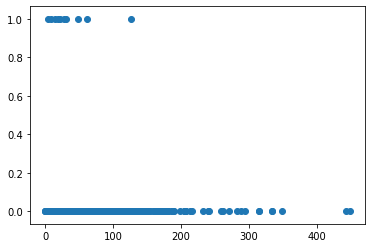

In [13]:
plt.scatter(df_list3['totalError'].tolist(), 
            df_list3['desistente'].tolist(), 
            marker='o')
plt.show()

In [14]:
testt = df_list3[df_list3['totalError']<=61]
testt = testt[testt['subm/quest']<=6.888889]
testt = testt[testt['subm/quest']>=1.423077]
testt = testt[testt['timeInSecounds']<=37364]
testt = testt[testt['timeInSecounds']>=4558]
testt

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,28.0,25.0,23.0,13,0,53,24,2.208333,12444
5,6d04019e-905c-4d70-810a-a7f1fa34fe22,17159714-8c41-4d95-af35-14c7b1bbe053,11.0,17.0,14.0,14,0,28,14,2.000000,12353
7,6d04019e-905c-4d70-810a-a7f1fa34fe22,25d1f3ab-f555-4d3c-bb93-ad4863e660d3,3.0,13.0,7.0,13,0,16,7,2.285714,6202
12,6d04019e-905c-4d70-810a-a7f1fa34fe22,706f3450-350e-4177-a42c-e4be705b75b2,17.0,38.0,31.0,15,0,55,29,1.896552,9829
13,6d04019e-905c-4d70-810a-a7f1fa34fe22,85803046-5fe9-4398-9715-11861f90fee0,12.0,56.0,54.0,15,0,68,29,2.344828,6661
...,...,...,...,...,...,...,...,...,...,...,...
428,f7144f91-f493-4e55-aac5-39f0d4add995,d8767187-903a-4e4f-a706-98c3655bd842,17.0,31.0,30.0,15,0,48,27,1.777778,13412
430,f7144f91-f493-4e55-aac5-39f0d4add995,e589c0fb-303e-44f8-9720-b6000b3be9ce,22.0,30.0,30.0,15,0,52,25,2.080000,21904
435,f7144f91-f493-4e55-aac5-39f0d4add995,eed5375c-5447-42cc-ab42-113abc102084,48.0,39.0,35.0,15,0,87,27,3.222222,36208
437,f7144f91-f493-4e55-aac5-39f0d4add995,f3ec9bc7-c46b-44fd-a887-877a6f0116f2,34.0,14.0,14.0,15,0,48,15,3.200000,17386


In [15]:
grap3 = df_list3[df_list3['totalError']>0]
grap = grap3[grap3['desistente']==1]
teste3 = grap3[grap3['totalError']<=grap['totalError'].max()]
print(teste3.count().values[0])
teste3

360


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,7.0,31.0,31.0,14,0,38,29,1.310345,12275
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,28.0,25.0,23.0,13,0,53,24,2.208333,12444
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,56.0,67.0,41.0,15,0,123,29,4.241379,71581
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,10a7114c-acfa-4168-9c7b-5f0ade3e35b0,102.0,48.0,33.0,13,0,150,29,5.172414,85528
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,1634bece-b1d5-4ed2-8946-d61272e4e25c,101.0,37.0,25.0,15,0,138,23,6.000000,116678
...,...,...,...,...,...,...,...,...,...,...,...
435,f7144f91-f493-4e55-aac5-39f0d4add995,eed5375c-5447-42cc-ab42-113abc102084,48.0,39.0,35.0,15,0,87,27,3.222222,36208
436,f7144f91-f493-4e55-aac5-39f0d4add995,f2b91eac-be6d-4545-b434-52d7b42d1282,73.0,46.0,29.0,15,0,119,27,4.407407,50129
437,f7144f91-f493-4e55-aac5-39f0d4add995,f3ec9bc7-c46b-44fd-a887-877a6f0116f2,34.0,14.0,14.0,15,0,48,15,3.200000,17386
438,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,121.0,34.0,29.0,15,0,155,27,5.740741,96513


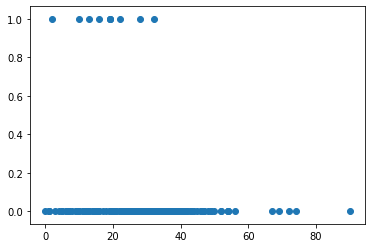

In [16]:
plt.scatter(df_list3['acert_100'].tolist(), 
            df_list3['desistente'].tolist(), 
            marker='o')
plt.show()

In [17]:
grap3 = df_list3[df_list3['acert_100']>0]
grap = grap3[grap3['desistente']==1]
teste3 = grap3[grap3['acert_100']<=grap['acert_100'].max()]
print(teste3.count().values[0])
teste3

321


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,7.0,31.0,31.0,14,0,38,29,1.310345,12275
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,28.0,25.0,23.0,13,0,53,24,2.208333,12444
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,1634bece-b1d5-4ed2-8946-d61272e4e25c,101.0,37.0,25.0,15,0,138,23,6.000000,116678
5,6d04019e-905c-4d70-810a-a7f1fa34fe22,17159714-8c41-4d95-af35-14c7b1bbe053,11.0,17.0,14.0,14,0,28,14,2.000000,12353
7,6d04019e-905c-4d70-810a-a7f1fa34fe22,25d1f3ab-f555-4d3c-bb93-ad4863e660d3,3.0,13.0,7.0,13,0,16,7,2.285714,6202
...,...,...,...,...,...,...,...,...,...,...,...
438,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,121.0,34.0,29.0,15,0,155,27,5.740741,96513
439,f7144f91-f493-4e55-aac5-39f0d4add995,fd66de81-b657-41bb-9903-73370d0a0158,17.0,19.0,19.0,11,0,36,24,1.500000,9063
440,8f055c33-00ad-4284-aec8-da401901e795,94e36d62-d8e9-4177-82cd-3bc0d9aeb3fe,0.0,27.0,27.0,15,0,27,27,1.000000,122
441,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.0,1.0,1.0,12,0,1,1,1.000000,26


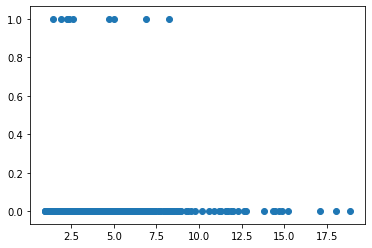

In [18]:
plt.scatter(df_list3['subm/quest'].tolist(), 
            df_list3['desistente'].tolist(), 
            marker='o')
plt.show()

In [19]:
grap3 = df_list3[df_list3['subm/quest']>0]
grap = grap3[grap3['desistente']==1]
teste3 = grap3[grap3['subm/quest']<=grap['subm/quest'].max()]
print(teste3.count().values[0])
teste3

400


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,7.0,31.0,31.0,14,0,38,29,1.310345,12275
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,28.0,25.0,23.0,13,0,53,24,2.208333,12444
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,56.0,67.0,41.0,15,0,123,29,4.241379,71581
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,10a7114c-acfa-4168-9c7b-5f0ade3e35b0,102.0,48.0,33.0,13,0,150,29,5.172414,85528
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,1634bece-b1d5-4ed2-8946-d61272e4e25c,101.0,37.0,25.0,15,0,138,23,6.000000,116678
...,...,...,...,...,...,...,...,...,...,...,...
438,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,121.0,34.0,29.0,15,0,155,27,5.740741,96513
439,f7144f91-f493-4e55-aac5-39f0d4add995,fd66de81-b657-41bb-9903-73370d0a0158,17.0,19.0,19.0,11,0,36,24,1.500000,9063
440,8f055c33-00ad-4284-aec8-da401901e795,94e36d62-d8e9-4177-82cd-3bc0d9aeb3fe,0.0,27.0,27.0,15,0,27,27,1.000000,122
441,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.0,1.0,1.0,12,0,1,1,1.000000,26


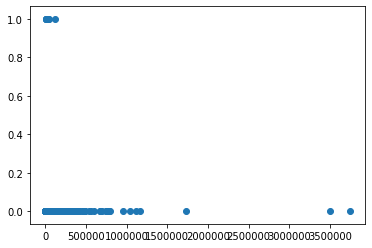

In [20]:
plt.scatter(df_list3['timeInSecounds'].tolist(), 
            df_list3['desistente'].tolist(), 
            marker='o')
plt.show()

In [21]:
df_list3[df_list3['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
52,77335557-c5d1-4144-be6e-84b6114ec22e,ed33e3bf-cbe0-4944-997e-e75b5e4cf3ff,31.0,30.0,28.0,2,1,61,27,2.259259,20637
137,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,ed3e0097-1441-41df-9e12-671039749c8e,21.0,16.0,16.0,2,1,37,16,2.312500,7670
202,8f055c33-00ad-4284-aec8-da401901e795,bc9c1123-f35a-4c72-984f-1de0d004b881,19.0,25.0,19.0,2,1,44,17,2.588235,23336
237,d99923f0-d174-4902-9759-c8220b821d36,0fbac3c1-3d99-4581-a5e7-fbf7e625b1d9,27.0,16.0,13.0,2,1,43,18,2.388889,43821
291,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1f7198ad-6304-4f2f-8ef4-909a2290abd9,126.0,22.0,19.0,2,1,148,18,8.222222,125266
303,e9c7c378-eac4-44b2-b687-4dca6d77cd54,4f8b3b66-e117-45e5-996b-0828cc9d3ab2,48.0,14.0,10.0,2,1,62,9,6.888889,32474
332,e9c7c378-eac4-44b2-b687-4dca6d77cd54,bcc3217a-0a90-4347-88aa-12de01669ce7,15.0,25.0,22.0,2,1,40,21,1.904762,4558
336,e9c7c378-eac4-44b2-b687-4dca6d77cd54,d452ae68-b4fa-4740-bb6c-e97d95fee658,4.0,33.0,32.0,2,1,37,26,1.423077,7545
386,f7144f91-f493-4e55-aac5-39f0d4add995,7290c6b6-a9a9-40eb-bb21-0d736e037725,8.0,2.0,2.0,2,1,10,2,5.000000,6260
426,f7144f91-f493-4e55-aac5-39f0d4add995,d2c6d678-757a-40c5-b7f9-ca36639da156,61.0,19.0,19.0,2,1,80,17,4.705882,37364


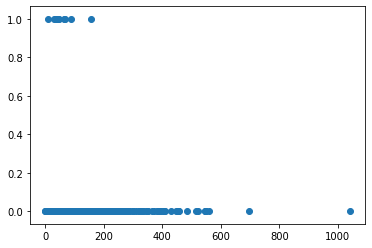

1.0
1040.0


In [22]:
df_list3['teste'] = df_list3['acert_100'] * df_list3['subm/quest']
grap3 = df_list3[df_list3['teste']>0]
plt.scatter(grap3['teste'].tolist(), 
            grap3['desistente'].tolist(), 
            marker='o')
plt.show()
print(grap3['teste'].min())
print(grap3['teste'].max())

In [23]:
grap = grap3[grap3['desistente']==1]
#test_ndes = ind[ind['desistente']==0]

teste3 = grap3[grap3['teste']<=grap['teste'].max()]
print(teste3.count().values[0])
teste3[teste3['desistente']==1]
#teste3

297


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste
52,77335557-c5d1-4144-be6e-84b6114ec22e,ed33e3bf-cbe0-4944-997e-e75b5e4cf3ff,31.0,30.0,28.0,2,1,61,27,2.259259,20637,63.259259
137,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,ed3e0097-1441-41df-9e12-671039749c8e,21.0,16.0,16.0,2,1,37,16,2.312500,7670,37.000000
202,8f055c33-00ad-4284-aec8-da401901e795,bc9c1123-f35a-4c72-984f-1de0d004b881,19.0,25.0,19.0,2,1,44,17,2.588235,23336,49.176471
237,d99923f0-d174-4902-9759-c8220b821d36,0fbac3c1-3d99-4581-a5e7-fbf7e625b1d9,27.0,16.0,13.0,2,1,43,18,2.388889,43821,31.055556
291,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1f7198ad-6304-4f2f-8ef4-909a2290abd9,126.0,22.0,19.0,2,1,148,18,8.222222,125266,156.222222
303,e9c7c378-eac4-44b2-b687-4dca6d77cd54,4f8b3b66-e117-45e5-996b-0828cc9d3ab2,48.0,14.0,10.0,2,1,62,9,6.888889,32474,68.888889
332,e9c7c378-eac4-44b2-b687-4dca6d77cd54,bcc3217a-0a90-4347-88aa-12de01669ce7,15.0,25.0,22.0,2,1,40,21,1.904762,4558,41.904762
336,e9c7c378-eac4-44b2-b687-4dca6d77cd54,d452ae68-b4fa-4740-bb6c-e97d95fee658,4.0,33.0,32.0,2,1,37,26,1.423077,7545,45.538462
386,f7144f91-f493-4e55-aac5-39f0d4add995,7290c6b6-a9a9-40eb-bb21-0d736e037725,8.0,2.0,2.0,2,1,10,2,5.000000,6260,10.000000
426,f7144f91-f493-4e55-aac5-39f0d4add995,d2c6d678-757a-40c5-b7f9-ca36639da156,61.0,19.0,19.0,2,1,80,17,4.705882,37364,89.411765


In [24]:
df_list3['percTotalError'] = df_list3['totalError'] / df_list3['total_subm']
df_list3['percTotalAcert'] = df_list3['totalAcert'] / df_list3['total_subm']
df_list3['percAcert_100'] = df_list3['acert_100'] / df_list3['total_subm']

In [25]:
df_list3[df_list3['desistente']==1].reset_index()

,index,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste,percTotalError,percTotalAcert,percAcert_100
0,52,77335557-c5d1-4144-be6e-84b6114ec22e,ed33e3bf-cbe0-4944-997e-e75b5e4cf3ff,31.0,30.0,28.0,2,1,61,27,2.259259,20637,63.259259,0.508197,0.491803,0.459016
1,137,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,ed3e0097-1441-41df-9e12-671039749c8e,21.0,16.0,16.0,2,1,37,16,2.312500,7670,37.000000,0.567568,0.432432,0.432432
2,202,8f055c33-00ad-4284-aec8-da401901e795,bc9c1123-f35a-4c72-984f-1de0d004b881,19.0,25.0,19.0,2,1,44,17,2.588235,23336,49.176471,0.431818,0.568182,0.431818
3,237,d99923f0-d174-4902-9759-c8220b821d36,0fbac3c1-3d99-4581-a5e7-fbf7e625b1d9,27.0,16.0,13.0,2,1,43,18,2.388889,43821,31.055556,0.627907,0.372093,0.302326
4,291,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1f7198ad-6304-4f2f-8ef4-909a2290abd9,126.0,22.0,19.0,2,1,148,18,8.222222,125266,156.222222,0.851351,0.148649,0.128378
5,303,e9c7c378-eac4-44b2-b687-4dca6d77cd54,4f8b3b66-e117-45e5-996b-0828cc9d3ab2,48.0,14.0,10.0,2,1,62,9,6.888889,32474,68.888889,0.774194,0.225806,0.161290
6,332,e9c7c378-eac4-44b2-b687-4dca6d77cd54,bcc3217a-0a90-4347-88aa-12de01669ce7,15.0,25.0,22.0,2,1,40,21,1.904762,4558,41.904762,0.375000,0.625000,0.550000
7,336,e9c7c378-eac4-44b2-b687-4dca6d77cd54,d452ae68-b4fa-4740-bb6c-e97d95fee658,4.0,33.0,32.0,2,1,37,26,1.423077,7545,45.538462,0.108108,0.891892,0.864865
8,386,f7144f91-f493-4e55-aac5-39f0d4add995,7290c6b6-a9a9-40eb-bb21-0d736e037725,8.0,2.0,2.0,2,1,10,2,5.000000,6260,10.000000,0.800000,0.200000,0.200000
9,426,f7144f91-f493-4e55-aac5-39f0d4add995,d2c6d678-757a-40c5-b7f9-ca36639da156,61.0,19.0,19.0,2,1,80,17,4.705882,37364,89.411765,0.762500,0.237500,0.237500


In [26]:
#t = df_list3[df_list3['totalError']>= 0.5769]
#há a opção de tirar o acert_100, mas a probabilidade de acertar alguem que vai seguir vai ser maior
#aqui há 12/13
t = df_list3[df_list3['percAcert_100']<= 0.459016]
t = t[t['percTotalError']<= 0.8]
#    #t = df_list1[df_list1['totalError']>= 0.57]
t = t[t['teste']<=89.412]
#    #t = t[t['teste']<=7.5]
t = t[t['teste']>=31]
t = t[t['totalQuest']<=27]
t = t[t['totalQuest']>=9]
t = t[t['subm/quest']<=8.2223]
#    #t = t[t['subm/quest']<=9]
t = t[t['subm/quest']>=2.25]
t = t[t['total_subm']>=43]
t = t[t['total_subm']<=80]
t = t[t['timeInSecounds']>=6260]
t = t[t['timeInSecounds']<=43821]
t

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste,percTotalError,percTotalAcert,percAcert_100
15,6d04019e-905c-4d70-810a-a7f1fa34fe22,972c0a3e-0615-443b-9ac5-0e334fef0524,37.0,33.0,22.0,15,0,70,23,3.043478,33615,66.956522,0.528571,0.471429,0.314286
23,6d04019e-905c-4d70-810a-a7f1fa34fe22,bec164ab-c6db-4dde-ae13-5a0661eeed35,24.0,27.0,17.0,5,0,51,16,3.187500,18422,54.187500,0.470588,0.529412,0.333333
36,77335557-c5d1-4144-be6e-84b6114ec22e,3b13a996-3002-4250-9b5f-272bdb8c0ee3,40.0,23.0,23.0,5,0,63,20,3.150000,31538,72.450000,0.634921,0.365079,0.365079
59,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0cfc1317-c115-4db2-a303-d7e955cb6a87,37.0,32.0,28.0,15,0,69,27,2.555556,14435,71.555556,0.536232,0.463768,0.405797
64,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,174b3116-31b8-4f19-bf06-2b597f96cc8a,49.0,28.0,28.0,15,0,77,27,2.851852,25304,79.851852,0.636364,0.363636,0.363636
78,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,35a86d2d-e321-4d35-997e-e908d5335bbe,42.0,33.0,30.0,15,0,75,26,2.884615,37636,86.538462,0.560000,0.440000,0.400000
101,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,7a076e15-2eeb-47dd-b9b3-cdb8c2993f04,34.0,39.0,28.0,15,0,73,27,2.703704,11657,75.703704,0.465753,0.534247,0.383562
103,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,807c90d6-2fff-4624-8a3d-ca95bee2cb3f,36.0,32.0,29.0,15,0,68,27,2.518519,31853,73.037037,0.529412,0.470588,0.426471
116,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,a90ff56d-c000-4bc5-9078-ee23c8f74c90,26.0,24.0,22.0,15,0,50,19,2.631579,9110,57.894737,0.520000,0.480000,0.440000
120,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,b9240348-c223-4c0d-b75f-09c522952143,35.0,27.0,27.0,15,0,62,27,2.296296,26256,62.000000,0.564516,0.435484,0.435484


In [27]:
t.groupby(['ateLista'])['user_id'].count()

ateLista
2      4
5      2
6      1
9      1
11     3
12     3
13     1
14     3
15    22
Name: user_id, dtype: int64

In [28]:
testt = df_list3[df_list3['totalError']<=61]
testt = testt[testt['totalError']>=15]
testt = testt[testt['totalQuest']>=9]
testt = testt[testt['totalQuest']<=27]
testt = testt[testt['total_subm']>=37]
testt = testt[testt['total_subm']<=80]
testt = testt[testt['subm/quest']<=6.888889]
testt = testt[testt['subm/quest']>=2.259259]
testt = testt[testt['timeInSecounds']<=43821]
testt = testt[testt['timeInSecounds']>=7670]
testt = testt[testt['percAcert_100']<=0.459016]
testt

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste,percTotalError,percTotalAcert,percAcert_100
15,6d04019e-905c-4d70-810a-a7f1fa34fe22,972c0a3e-0615-443b-9ac5-0e334fef0524,37.0,33.0,22.0,15,0,70,23,3.043478,33615,66.956522,0.528571,0.471429,0.314286
23,6d04019e-905c-4d70-810a-a7f1fa34fe22,bec164ab-c6db-4dde-ae13-5a0661eeed35,24.0,27.0,17.0,5,0,51,16,3.187500,18422,54.187500,0.470588,0.529412,0.333333
36,77335557-c5d1-4144-be6e-84b6114ec22e,3b13a996-3002-4250-9b5f-272bdb8c0ee3,40.0,23.0,23.0,5,0,63,20,3.150000,31538,72.450000,0.634921,0.365079,0.365079
37,77335557-c5d1-4144-be6e-84b6114ec22e,3fad9bee-b2d1-45c6-863a-2e9f7ccbaa18,22.0,16.0,16.0,3,0,38,16,2.375000,15158,38.000000,0.578947,0.421053,0.421053
59,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0cfc1317-c115-4db2-a303-d7e955cb6a87,37.0,32.0,28.0,15,0,69,27,2.555556,14435,71.555556,0.536232,0.463768,0.405797
64,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,174b3116-31b8-4f19-bf06-2b597f96cc8a,49.0,28.0,28.0,15,0,77,27,2.851852,25304,79.851852,0.636364,0.363636,0.363636
78,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,35a86d2d-e321-4d35-997e-e908d5335bbe,42.0,33.0,30.0,15,0,75,26,2.884615,37636,86.538462,0.560000,0.440000,0.400000
101,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,7a076e15-2eeb-47dd-b9b3-cdb8c2993f04,34.0,39.0,28.0,15,0,73,27,2.703704,11657,75.703704,0.465753,0.534247,0.383562
103,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,807c90d6-2fff-4624-8a3d-ca95bee2cb3f,36.0,32.0,29.0,15,0,68,27,2.518519,31853,73.037037,0.529412,0.470588,0.426471
116,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,a90ff56d-c000-4bc5-9078-ee23c8f74c90,26.0,24.0,22.0,15,0,50,19,2.631579,9110,57.894737,0.520000,0.480000,0.440000


In [29]:
df_list3[df_list3['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste,percTotalError,percTotalAcert,percAcert_100
52,77335557-c5d1-4144-be6e-84b6114ec22e,ed33e3bf-cbe0-4944-997e-e75b5e4cf3ff,31.0,30.0,28.0,2,1,61,27,2.259259,20637,63.259259,0.508197,0.491803,0.459016
137,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,ed3e0097-1441-41df-9e12-671039749c8e,21.0,16.0,16.0,2,1,37,16,2.312500,7670,37.000000,0.567568,0.432432,0.432432
202,8f055c33-00ad-4284-aec8-da401901e795,bc9c1123-f35a-4c72-984f-1de0d004b881,19.0,25.0,19.0,2,1,44,17,2.588235,23336,49.176471,0.431818,0.568182,0.431818
237,d99923f0-d174-4902-9759-c8220b821d36,0fbac3c1-3d99-4581-a5e7-fbf7e625b1d9,27.0,16.0,13.0,2,1,43,18,2.388889,43821,31.055556,0.627907,0.372093,0.302326
291,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1f7198ad-6304-4f2f-8ef4-909a2290abd9,126.0,22.0,19.0,2,1,148,18,8.222222,125266,156.222222,0.851351,0.148649,0.128378
303,e9c7c378-eac4-44b2-b687-4dca6d77cd54,4f8b3b66-e117-45e5-996b-0828cc9d3ab2,48.0,14.0,10.0,2,1,62,9,6.888889,32474,68.888889,0.774194,0.225806,0.161290
332,e9c7c378-eac4-44b2-b687-4dca6d77cd54,bcc3217a-0a90-4347-88aa-12de01669ce7,15.0,25.0,22.0,2,1,40,21,1.904762,4558,41.904762,0.375000,0.625000,0.550000
336,e9c7c378-eac4-44b2-b687-4dca6d77cd54,d452ae68-b4fa-4740-bb6c-e97d95fee658,4.0,33.0,32.0,2,1,37,26,1.423077,7545,45.538462,0.108108,0.891892,0.864865
386,f7144f91-f493-4e55-aac5-39f0d4add995,7290c6b6-a9a9-40eb-bb21-0d736e037725,8.0,2.0,2.0,2,1,10,2,5.000000,6260,10.000000,0.800000,0.200000,0.200000
426,f7144f91-f493-4e55-aac5-39f0d4add995,d2c6d678-757a-40c5-b7f9-ca36639da156,61.0,19.0,19.0,2,1,80,17,4.705882,37364,89.411765,0.762500,0.237500,0.237500


In [31]:
q = testt.groupby(['ateLista'])['user_id'].count()
#5/17/26/43
q

ateLista
2      5
3      1
5      2
6      1
9      1
11     4
12     3
13     1
14     3
15    22
Name: user_id, dtype: int64

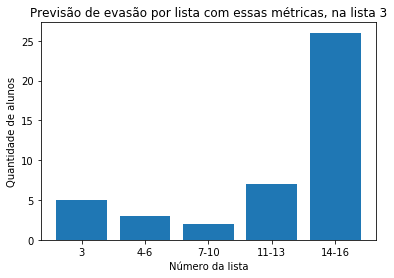

In [32]:
faixaLista = ['3', '4-6', '7-10', '11-13', '14-16']
f1 = q[2]
f2 = q[3]+q[5]
f3 = q[6]+q[9]
#q[10]=null
f4 = q[11]+q[12]
f5 = q[13]+q[14]+q[15]
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos')
plt.xlabel('Número da lista')
plt.title('Previsão de evasão por lista com essas métricas, na lista 3')
plt.show()

508
1


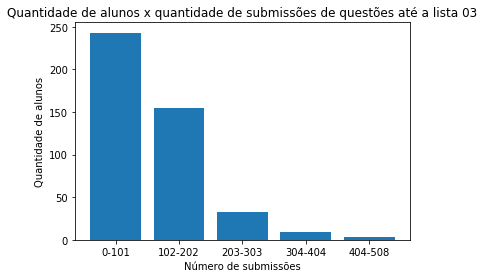

In [34]:
print(df_list3['total_subm'].max())
print(df_list3['total_subm'].min())
faixaLista = ['0-101', '102-202', '203-303', '304-404', '404-508']
f1 = df_list3[df_list3['total_subm']<=101].count().values[0]
f2 = df_list3[df_list3['total_subm']<=202].count().values[0] - f1
f3 = df_list3[df_list3['total_subm']<=303].count().values[0] - f2 - f1
f4 = df_list3[df_list3['total_subm']<=404].count().values[0] - f3 - f2 - f1
f5 = df_list3[df_list3['total_subm']<=508].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos')
plt.xlabel('Número de submissões')
plt.title('Quantidade de alunos x quantidade de submissões de questões até a lista 03')
plt.show()

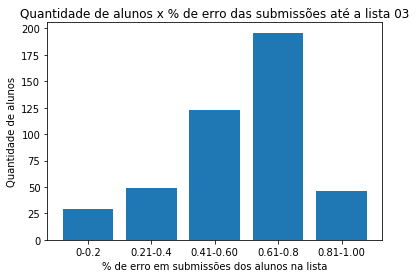

In [36]:
faixaLista = ['0-0.2', '0.21-0.4', '0.41-0.60', '0.61-0.8', '0.81-1.00']
f1 = df_list3[df_list3['percTotalError']<=0.2].count().values[0]
f2 = df_list3[df_list3['percTotalError']<=0.4].count().values[0] - f1
f3 = df_list3[df_list3['percTotalError']<=0.6].count().values[0] - f2 - f1
f4 = df_list3[df_list3['percTotalError']<=0.8].count().values[0] - f3 - f2 - f1
f5 = df_list3[df_list3['percTotalError']<=1].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos')
plt.xlabel('% de erro em submissões dos alunos na lista')
plt.title('Quantidade de alunos x % de erro das submissões até a lista 03')
plt.show()

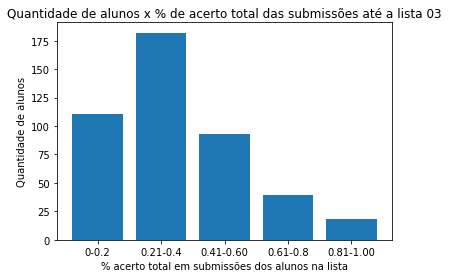

In [37]:
faixaLista = ['0-0.2', '0.21-0.4', '0.41-0.60', '0.61-0.8', '0.81-1.00']
f1 = df_list3[df_list3['percAcert_100']<=0.2].count().values[0]
f2 = df_list3[df_list3['percAcert_100']<=0.4].count().values[0] - f1
f3 = df_list3[df_list3['percAcert_100']<=0.6].count().values[0] - f2 - f1
f4 = df_list3[df_list3['percAcert_100']<=0.8].count().values[0] - f3 - f2 - f1
f5 = df_list3[df_list3['percAcert_100']<=1].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos')
plt.xlabel('% acerto total em submissões dos alunos na lista')
plt.title('Quantidade de alunos x % de acerto total das submissões até a lista 03')
plt.show()

18.814814814814813


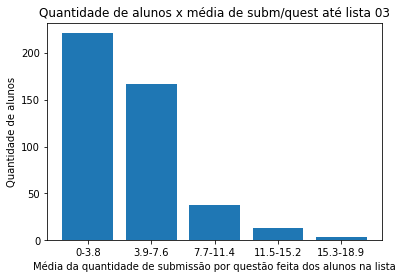

In [39]:
print(df_list3['subm/quest'].max())
faixaLista = ['0-3.8', '3.9-7.6', '7.7-11.4', '11.5-15.2', '15.3-18.9']
f1 = df_list3[df_list3['subm/quest']<=3.8].count().values[0]
f2 = df_list3[df_list3['subm/quest']<=7.6].count().values[0] - f1
f3 = df_list3[df_list3['subm/quest']<=11.4].count().values[0] - f2 - f1
f4 = df_list3[df_list3['subm/quest']<=15.2].count().values[0] - f3 - f2 - f1
f5 = df_list3[df_list3['subm/quest']<=18.9].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos')
plt.xlabel('Média da quantidade de submissão por questão feita dos alunos na lista')
plt.title('Quantidade de alunos x média de subm/quest até lista 03')
plt.show()

8.222222222222221


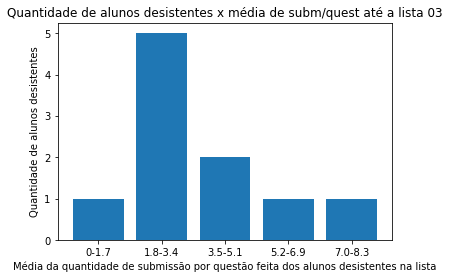

In [41]:
s = df_list3[df_list3['desistente']==1]
print(s['subm/quest'].max())
faixaLista = ['0-1.7', '1.8-3.4', '3.5-5.1', '5.2-6.9', '7.0-8.3']
f1 = s[s['subm/quest']<=1.7].count().values[0]
f2 = s[s['subm/quest']<=3.4].count().values[0] - f1
f3 = s[s['subm/quest']<=5.1].count().values[0] - f2 - f1
f4 = s[s['subm/quest']<=6.9].count().values[0] - f3 - f2 - f1
f5 = s[s['subm/quest']<=8.3].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos desistentes')
plt.xlabel('Média da quantidade de submissão por questão feita dos alunos desistentes na lista')
plt.title('Quantidade de alunos desistentes x média de subm/quest até a lista 03')
plt.show()

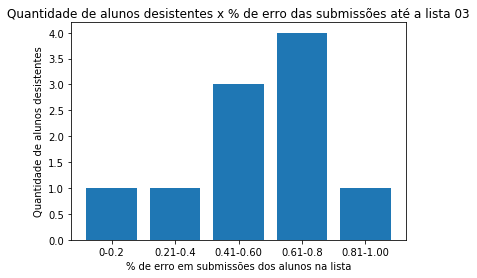

In [43]:
s = df_list3[df_list3['desistente']==1]
faixaLista = ['0-0.2', '0.21-0.4', '0.41-0.60', '0.61-0.8', '0.81-1.00']
f1 = s[s['percTotalError']<=0.2].count().values[0]
f2 = s[s['percTotalError']<=0.4].count().values[0] - f1
f3 = s[s['percTotalError']<=0.6].count().values[0] - f2 - f1
f4 = s[s['percTotalError']<=0.8].count().values[0] - f3 - f2 - f1
f5 = s[s['percTotalError']<=1.0].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos desistentes')
plt.xlabel('% de erro em submissões dos alunos na lista')
plt.title('Quantidade de alunos desistentes x % de erro das submissões até a lista 03')
plt.show()

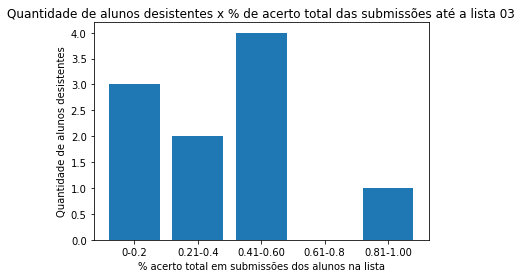

In [46]:
s = df_list3[df_list3['desistente']==1]
faixaLista = ['0-0.2', '0.21-0.4', '0.41-0.60', '0.61-0.8', '0.81-1.00']
f1 = s[s['percAcert_100']<=0.2].count().values[0]
f2 = s[s['percAcert_100']<=0.4].count().values[0] - f1
f3 = s[s['percAcert_100']<=0.6].count().values[0] - f2 - f1
f4 = s[s['percAcert_100']<=0.8].count().values[0] - f3 - f2 - f1
f5 = s[s['percAcert_100']<=1.0].count().values[0] - f4 - f3 - f2 - f1
qtdPfaixa = [f1, f2, f3, f4, f5]
plt.bar(faixaLista, qtdPfaixa)
plt.ylabel('Quantidade de alunos desistentes')
plt.xlabel('% acerto total em submissões dos alunos na lista')
plt.title('Quantidade de alunos desistentes x % de acerto total das submissões até a lista 03')
plt.show()